# GRIP - Task 3 - K Means Clustering 
## By Bhaskar B Sarkar

#### Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

#### Loading dataset

In [19]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Separating the features in one variable 

In [21]:
x = iris.iloc[:, [1,2,3,4]].values

#### To find the value of K to be used in K-Means Clustering, we will use the 'Elbow Method'.

Finding the sum of squarred errors for different values of k ranging from 1 to 10.


In [22]:
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

Plotting the elbow graph with 'SSE' vs 'K-value'

([<matplotlib.axis.XTick at 0x24f6f9e7f08>,
 <a list of 10 Text xticklabel objects>)

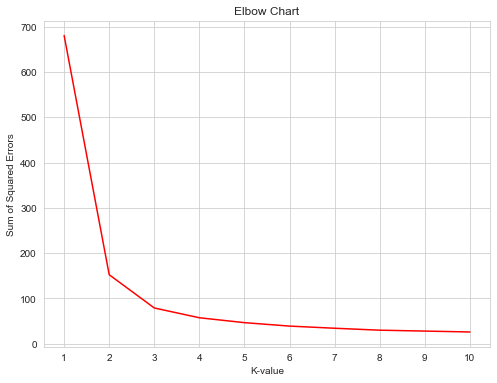

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.plot(range(1,11), sse, color='red')
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Chart')
plt.xticks(ticks=range(1,11))

#### As we can see, the elbow is present when the value of K = 3. So, we got K=3 as number of clusters.

We will now scale the data for a better model prediction

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [25]:
iris['Category'] = y_kmeans
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Category
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


#### Considering petal lenght and petal width to represent identification categories

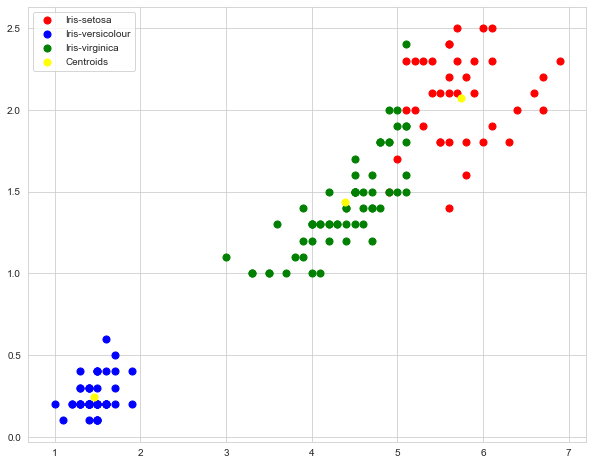

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans==0, 3], color='red', s = 50, label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans==1, 3], color='blue', s = 50, label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans==2, 3], color='green', s = 50, label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], color='yellow', s= 50, label='Centroids')
plt.legend()